<a href="https://colab.research.google.com/github/SFBayLaser/DeepLearn/blob/develop/DataLearningWorksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data file routine...
Start by grabbing data

In [20]:
! curl -O https://www.nevis.columbia.edu/~kazuhiro/test.h5 ./
! curl -O https://www.nevis.columbia.edu/~kazuhiro/train.h5 ./

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.1M  100 71.1M    0     0  26.7M      0  0:00:02  0:00:02 --:--:-- 26.7M
curl: (6) Could not resolve host: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70.9M  100 70.9M    0     0  27.4M      0  0:00:02  0:00:02 --:--:-- 27.4M
curl: (6) Could not resolve host: 


Next step...

In [21]:
! ls -lta

total 145500
-rw-r--r-- 1 root root 74358372 Jul  3 14:03 train.h5
-rw-r--r-- 1 root root 74614580 Jul  3 14:03 test.h5
drwxr-xr-x 1 root root     4096 Jul  3 13:05 .
drwxr-xr-x 1 root root     4096 Jul  3 13:01 ..
drwxr-xr-x 1 root root     4096 Jun 26 16:07 .config
drwxr-xr-x 1 root root     4096 Jun 18 16:14 sample_data


In [0]:
import h5py as h5

In [23]:
# Open HDF5 file
f = h5.File("test.h5","r")
#print out the data stored
for key in f.keys(): print(key)

image0
image1
label


Look at the data

In [24]:
f['image0']

<HDF5 dataset "image0": shape (20000, 256, 256), type "<f4">

In [25]:
f['image0'].shape

(20000, 256, 256)

In [26]:
f['image0'][0].shape

(256, 256)

Visualize an image here 

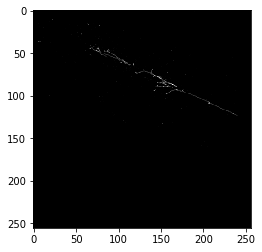

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(f['image0'][2],cmap='gray')
plt.show()

Particle ID: 2212.0


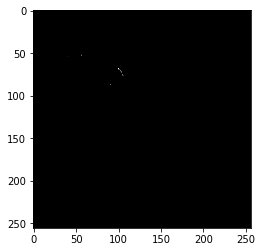

Particle ID: 11.0


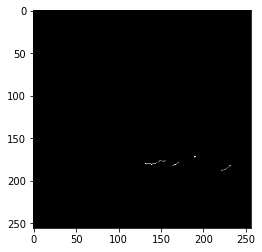

Particle ID: 11.0


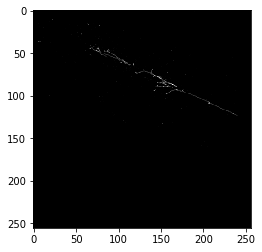

Particle ID: 13.0


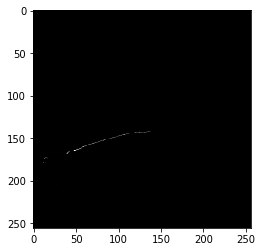

Particle ID: 13.0


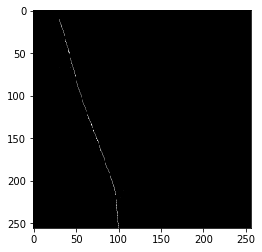

Particle ID: 2212.0


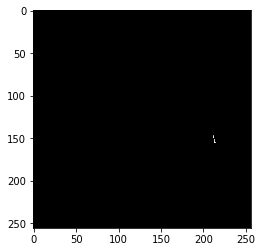

Particle ID: 211.0


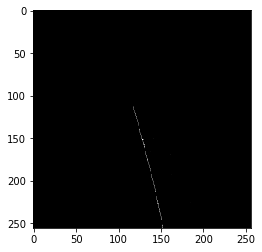

Particle ID: 211.0


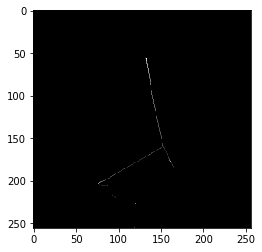

Particle ID: 22.0


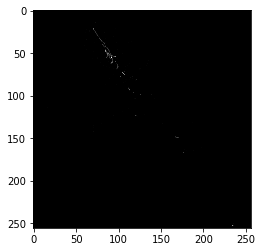

Particle ID: 11.0


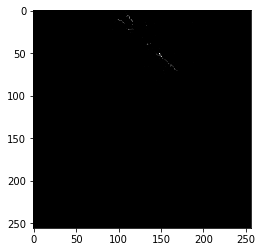

In [28]:
for idx in range(10):
  image = f['image0'][idx]
  label = f['label'][idx]
  print('Particle ID:',label)
  plt.imshow(image,cmap='gray')
  plt.show()

In [29]:
import numpy as np
np.unique(f['label'])

array([  11.,   13.,   22.,  211., 2212.], dtype=float32)

In [30]:
f['label'].shape

(20000,)

In [31]:
f['label'].shape
#for idx in range(f['label'].shape[0]):
#  print('idx',f['label'][idx])
  
label = np.array(f['label'])
where = np.where(label==11)
electron_label = label[where]
print(len(electron_label))

4134


In [32]:
np.shape(where)
print('hmmm')
print(electron_label[:10],' ',np.shape(where))
print(electron_label[-10:])
np.unique(label,return_counts=True)

hmmm
[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]   (1, 4134)
[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]


(array([  11.,   13.,   22.,  211., 2212.], dtype=float32),
 array([4134, 4188, 4103, 4180, 3395]))

In [33]:
[v for v in range(30)][10:20]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [0]:
#label = np.array(f['label'])
#where = np.where(label==11)
#images = np.array(f['image0'])
#electron_images = images[where]
#for entry in range(10):
#  plt.imshow(electron_images[entry],cmap='jet')
#  plt.show()

In [35]:
where = np.array(where).reshape(-1)
where.shape
print(where[:10])

[ 1  2  9 20 22 25 32 36 42 48]


Particle code: 11.0


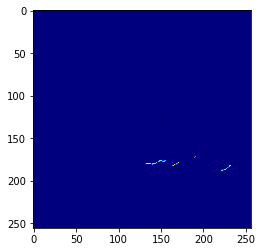

Particle code: 11.0


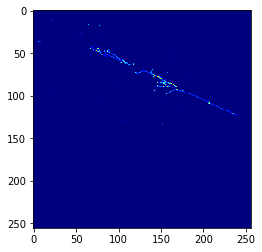

Particle code: 11.0


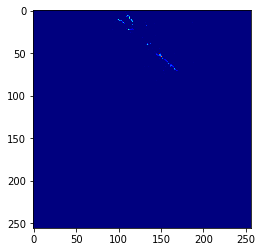

Particle code: 11.0


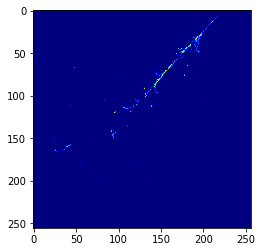

Particle code: 11.0


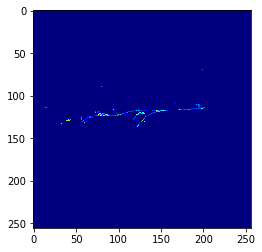

Particle code: 11.0


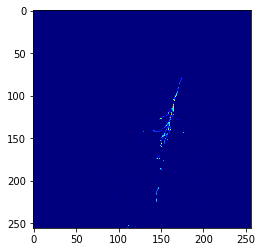

Particle code: 11.0


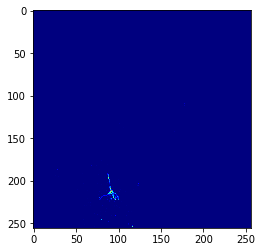

Particle code: 11.0


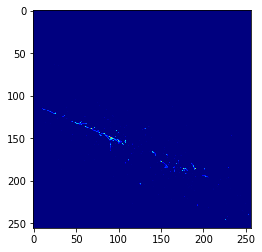

Particle code: 11.0


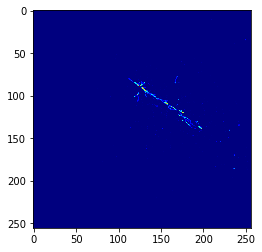

Particle code: 11.0


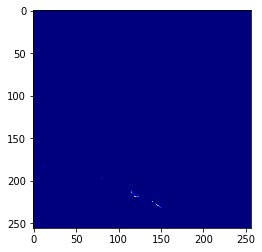

In [36]:
for idx in range(10):
  entry = where[idx]
  image = f['image0'][entry]
  label = f['label'][entry]
  print('Particle code:',label)
  plt.imshow(image,cmap='jet')
  plt.show()

In [38]:
#where is nothing
where = None
label = np.array(f['label'])
where = np.where(label==11)

where = np.array(where)[:,:5]
where.shape

(1, 5)